# K-NN Algorithm

**import libraries**

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**url of the dataset**

In [56]:
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

**read dataset to pandas dataframe**

In [57]:
dataset = pd.read_csv(url)
dataset.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


**assign column names to the dataset**

In [58]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [59]:
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- In this data we can see that petal-length and petal-width is very small as compared to sepal-length and sepal-width

In [60]:
dataset['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

- as we see here on the basis of sepal-length, sepal-width, petal-length, petal-width only 3 classes are defined

In [61]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

In [62]:
#print(x)
#print(y)

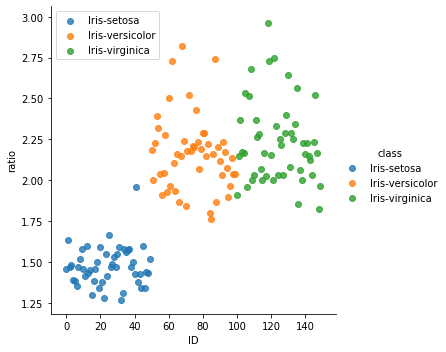

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['ID'] = dataset.index
dataset['ratio'] = dataset["sepal-length"]/dataset['sepal-width']
sns.lmplot(x='ID', y = 'ratio',data = dataset, hue = 'class', fit_reg=False )
plt.legend()
plt.show()

<font color='black'>
    
- so this plot is plotted on the bases of ID's(ie. index , how many records of data are their in the dataset)

- And on the basis of sepal length and sepal width we compute the ratio that is on y-axis
</font>

**train and test split**

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [65]:
#x_train
#x_test
#y_train
#y_test

**Feature Scaling**

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
# so these are normalised values with the hepl of feature scaling we have done this
#print(x_train)
#print(x_test)

**training and predictions**

In [68]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

- here in KNeighborsClassifier we use minkowski and euclidean metric bydefault it is minkowski we can change it to euclidean

In [69]:
y_pred = classifier.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

- so now we have our original label (ie. y_test) and predicted label(ie. y_pred) and then we compare both and draw the confusion matrix

**confusion Matrix**

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  8]], dtype=int64)

Text(0.5, 15.0, 'y_pred')

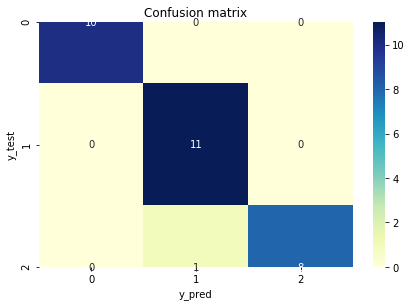

In [71]:
class_names  = [0, 1,2]  

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cnf_matrix), annot = True , cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix' , y = 1.1)
plt.ylabel('y_test')
plt.xlabel('y_pred')

**classification report**

In [72]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



- here macro avg is computed by **[ precision(1) + precision(2) + precision(3) / 3 ]**


- weighted avg is computed by **[ w1 * precision(1) + w2 * precision(2) + w3 * precision(3) / w1 + w2 + w3 ]** , where w1 is 9 and w2 is 11 and w3 is 10

**compare error rate with the K value**

In [73]:
error = []

# calculating error for k values between 1 and 40
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [74]:
error

[0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667]

Text(0, 0.5, 'Mean Error')

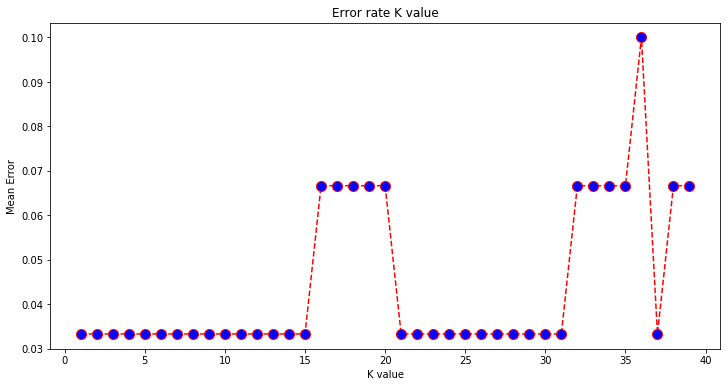

In [76]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color = 'red' , linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')